# Understanding the K-Nearest Neighbors (KNN) Algorithm

The K-Nearest Neighbors (KNN) algorithm is a simple, yet powerful machine learning algorithm that is used for both classification and regression. However, it is more widely used in classification problems in the industry. In this notebook, we will cover:

- Why KNN is a necessary algorithm in a data scientist's toolbox.
- The fundamentals of the KNN algorithm.
- How to choose the appropriate number of neighbors 'K'.
- Situations in which KNN is a suitable model choice.
- The mechanism of the KNN algorithm.
- A practical use case: Predicting diabetes using KNN.


## Why Do We Need KNN?

KNN is valuable for several reasons:

- **Ease of understanding and implementation**: The logic behind KNN is simple to grasp, making it an excellent starting point for practitioners to start exploring machine learning models.
- **No assumption about data**: KNN is a non-parametric algorithm, which means it does not make any assumptions about the underlying data distribution. This is helpful with real-world data that often does not follow theoretical assumptions.
- **Versatility**: It can be used for classification, regression, and search (as in recommender systems).


## What is KNN?

KNN works by finding the nearest data points in the training set to the new point that you want to classify. The 'K' in KNN is the number of nearest neighbors you want to consider. The category of the majority of the K nearest neighbors is the category into which the new data point is classified.


## How Do We Choose the Factor 'K'?

Choosing the right value for 'K' is critical to the performance of the algorithm. A smaller 'K' value can make the algorithm sensitive to noise in the data, while a larger 'K' value can smooth out the prediction but might blur the boundaries between classes. Cross-validation is typically used to select an optimal 'K' value that provides a balance between bias and variance.


## When Do We Use KNN?

KNN can be a good choice when:

- You have a labeled dataset.
- The dataset is not too large, as KNN can be slow to predict with many data points.
- The problem is a classification problem, though KNN can be used for regression as well.


## How Does KNN Algorithm Work?

When a new data point is introduced, the algorithm looks through the entire training set for the K most similar instances (the neighbors) and assigns the new data point to the class most common among its K nearest neighbors.


## Use Case: Predicting Diabetes

Let's explore a practical example where we apply the KNN algorithm to predict whether a person will have diabetes based on certain diagnostics measurements.


# K-Nearest Neighbors (KNN) for Diabetes Prediction

In this example, we'll use the K-Nearest Neighbors algorithm to build a model that can predict whether a person has diabetes based on diagnostic measurements. This is a binary classification problem where we will predict one of two possible outcomes: diabetic or not diabetic.


In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading

We'll start by loading the Pima Indians Diabetes dataset, which includes various diagnostic measures that can be used to predict diabetes.


In [2]:

df = pd.read_csv('/Users/ryanqchiqache/PycharmProjects/Machine-Learning-Learning-Center/learningML/diabetes.csv')


## Data Exploration

It's essential to explore the data to understand the distribution and check for any inconsistencies.


In [7]:
# Display the first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

We'll preprocess the data by scaling the features since KNN performs better with normalized data.


In [8]:
# Separate the features from the target attribute
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Split the Dataset

Next, we split the dataset into a training set and a test set.


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Model Training

We'll find the optimal value of K by using cross-validation.


The optimal number of neighbors is 11


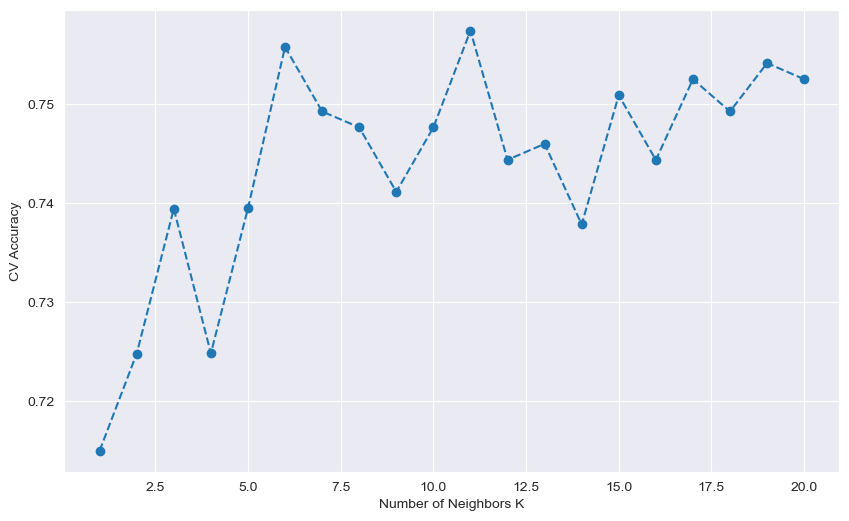

In [10]:
from sklearn.model_selection import cross_val_score

# List to hold the cross-validation scores
cv_scores = []

# Try different values for K
for k in range(1, 21):
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal K
optimal_k = np.argmax(cv_scores) + 1
print(f'The optimal number of neighbors is {optimal_k}')

# Plot the CV accuracy for each K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), cv_scores, marker='o', linestyle='dashed')
plt.xlabel('Number of Neighbors K')
plt.ylabel('CV Accuracy')
plt.show()


## Model Evaluation

We'll evaluate the model on the test set.


In [11]:
# Train the KNN classifier with the optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Print the evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the confusion matrix
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'],
                   columns=['Predicted Negative', 'Predicted Positive']), '\n')

# Print the classification report
print("Classification Report:")
print(class_report, '\n')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(cv_scores)
print(f"Average Cross-validation Score: {cv_scores.mean():.2f}", '\n')

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}%')


Confusion Matrix:
               Predicted Negative  Predicted Positive
True Negative                  78                  21
True Positive                  23                  32 

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        99
           1       0.60      0.58      0.59        55

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.71      0.71       154
 

Cross-validation Scores:
[0.68292683 0.82113821 0.72357724 0.7804878  0.77868852]
Average Cross-validation Score: 0.76 

Accuracy: 71.43%


#WordSpace and semantic similarity
- key 